# 1.0 Introduction 

# 2.0 Authenticating with Twitter's API 

In [1]:
!pip install Twython

     |████████████████████████████████| 151 kB 9.8 MB/s eta 0:00:01


In [2]:
from twython import Twython, TwythonError

In [288]:
pip install decorator==5.0.9

  Using cached decorator-5.0.9-py3-none-any.whl (8.9 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.6
    Uninstalling decorator-5.0.6:
      Successfully uninstalled decorator-5.0.6
Note: you may need to restart the kernel to use updated packages.


## 2.1 Enter app info and get auth URL 

In order to authenticate with Twitter, we'll provide the app details and ask for a one-time authorization URL to authenticate your user with this app.

Copy and paste the API key and secret from your Twitter app into a file named keys.txt. The first line is the API_KEY and the second line of the file is API_SECRET_KEY. For example, a template for the keys.txt:

In [ ]:
# %load keys.txt
GRvkTm3qkMOM8YjyNp3S6xLO4
YmHFrSSnC7D1qNUemiDbmtaMvF0saiFzyyW15erffxGCuQyiFg

In [7]:
# open the keys file
my_file = open("keys.txt", "r")

# read the raw data
content = my_file.read()

# split all lines by  newline character
API_KEY, API_SECRET_KEY = content.split("\n")

# close the file
my_file.close()

In [13]:
twitter = Twython(API_KEY, API_SECRET_KEY)

authentication_tokens = twitter.get_authentication_tokens()
print(authentication_tokens['auth_url'])

https://api.twitter.com/oauth/authenticate?oauth_token=LPL9XAAAAAABZBP-AAABftrkV8E


## 2.2 Authorized tokens 

In [14]:
# Replace the verifier with the pin number obtained with your web browser in the previous step
VERIFIER = '3396549'

twitter = Twython(API_KEY, API_SECRET_KEY,
                  authentication_tokens['oauth_token'],
                  authentication_tokens['oauth_token_secret'])

authorized_tokens = twitter.get_authorized_tokens(VERIFIER)

## 2.3 Use authorized tokens 

In [16]:
twitter = Twython(API_KEY, API_SECRET_KEY,
                  authorized_tokens['oauth_token'],
                  authorized_tokens['oauth_token_secret'])

twitter.verify_credentials()

{'id': 1486095105811484677,
 'id_str': '1486095105811484677',
 'name': 'Renato Farias',
 'screen_name': 'renatolinsfar',
 'location': '',
 'description': '',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 9,
 'friends_count': 50,
 'listed_count': 2,
 'created_at': 'Tue Jan 25 21:55:10 +0000 2022',
 'favourites_count': 0,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 1,
 'lang': None,
 'status': {'created_at': 'Sat Jan 29 01:36:43 +0000 2022',
  'id': 1487238244727238656,
  'id_str': '1487238244727238656',
  'text': 'Olá, eu acabei de publicar no Medium uma matéria sobre meu trabalho de Análise de Redes usando o dataset “Spotify M… https://t.co/UsjSkojKUd',
  'truncated': True,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [{'url': 'https://t.co/UsjSkojKUd',
     'expanded_url': 'https://twitter.com/i/web/status/1487238244727238656',
     'di

# 3.0 Twitter API basics 

We've already seen one User Object, the one corresponding to the logged-in user, via the call to verify_credentials() above. We can also fetch data for an arbitrary user:

- Acredito que em nosso projeto, não usaremos essa funcionalidade. 

# 4.0 Using Twitter's search API to get tweets of interest

Twitter's Search API allows you to fetch recent tweets according to a query of keywords, URLs, hashtags, user mentions, etc.

## 4.1 Using a cursor to get more than 100 tweets from a search 

## Getting some tweets for create some graph test 

- Explorando os limites da API na captura de dados. 

In [ ]:
# even with count=1000, we still get at most 100 tweets
search_response = twitter.search(q='#NFL', count=1000)
len(search_response['statuses'])

In order to get more tweets from a search, we can make use of a cursor:

In [ ]:
import itertools

NUM_TWEETS_TO_FETCH = 1000

cursor = twitter.cursor(twitter.search, q='#NFL', count=100, result_type='mixed')
search_tweets = list(itertools.islice(cursor, NUM_TWEETS_TO_FETCH))
len(search_tweets)

In [ ]:
import pandas as pd

# Search tweets
dict_ = {'user': [], 'date': [], 'text': [], 'favorite_count': []}
for tweet in search_tweets:
    dict_['user'].append(tweet['user']['screen_name'])
    dict_['date'].append(tweet['created_at'])
    dict_['text'].append(tweet['text'])
    dict_['favorite_count'].append(tweet['favorite_count'])
# Structure data in a pandas DataFrame for easier manipulation
df = pd.DataFrame(dict_)

In [ ]:
df.head()

In [ ]:
df.shape

# 5.0 Creating Twitter mention network

- Aqui começa a análise dos dados coletados. 

- A rede será criada de acordo com os steets que possuem o conteúdo "NFL".

- Será análisado os usuários mais citados dentro do contexto NFL. 

## 5.1 Get some tweets

- Limit API

In [275]:
twitter.get_application_rate_limit_status()['resources']['search']

{'/search/tweets': {'limit': 180, 'remaining': 180, 'reset': 1645217222}}

- Para extrapolar o uso da API, iremos usar a função "sleep", para usar as 180 requisições a cada 15 minutos, extraindo assim o máximo de tweets em um curto intervalo de tempo.

In [276]:
import itertools
import time 

NUM_TWEETS_TO_FETCH = 17900
limit = 0

while limit < 5:
    cursor = twitter.cursor(twitter.search, q='NFL', count=100, result_type='mixed')
    search_tweets += list(itertools.islice(cursor, NUM_TWEETS_TO_FETCH))
    limit += 1
    time.sleep(900) #Dormir por 15 minutos
    
len(search_tweets)

304300

In [277]:
len(search_tweets)

304300

- Aqui os tweets estão em formato de lista. 

In [123]:
#search_tweets

- Na célula abaixo, iremos filtra apenas os itens que nos interessa, e transforma a lista em um dataframe pandas.

In [258]:
import pandas as pd

# Search tweets
dict_ = {'user': [], 'date': [], 'text': [], 'location':[], 'favorite_count': []}
for tweet in search_tweets:
    dict_['user'].append(tweet['user']['screen_name'])
    dict_['date'].append(tweet['created_at'])
    dict_['text'].append(tweet['text'])
    dict_['location'].append(tweet['user']['location'])
    dict_['favorite_count'].append(tweet['favorite_count'])
# Structure data in a pandas DataFrame for easier manipulation
df = pd.DataFrame(dict_)

In [259]:
df.shape

(89500, 5)

## 5.2 Baixando o Dataset 

- Fazendo o download do dataset por dia. 

In [260]:
df.to_excel("day7.xlsx")

- Salvano dados separadamente, por dia. 

In [264]:
day7

,user,date,text,location,favorite_count
0,BleacherReport,Wed Feb 16 01:02:04 +0000 2022,The moment Van Jefferson found out his wife wa...,,69799
1,TomBrady,Wed Feb 16 20:11:27 +0000 2022,Mix in a water Matt…trust me https://t.co/WEVu...,,215360
2,ComplexSports,Tue Feb 15 23:35:31 +0000 2022,"“Van, Van! Your wife is giving birth right now...",,46931
3,DisguiseDevilin,Thu Feb 17 00:02:28 +0000 2022,#NFL #LorettaLynch https://t.co/MeuHTZ7cD8,Terre/Earth,0
4,sandsyyy,Thu Feb 17 00:02:27 +0000 2022,#Raidernation https://t.co/IzIxvwY9Vs,,0
...,...,...,...,...,...
89495,Ian39864754,Tue Feb 15 20:49:23 +0000 2022,@Dan_KP Why would Levy want players who win ev...,,0
89496,tjens71,Tue Feb 15 20:49:23 +0000 2022,RT @RapSheet: The NFL watched all of Eminem’s ...,,0
89497,Buffy619,Tue Feb 15 20:49:23 +0000 2022,RT @j_Borders: @HeatleyJared The 4 game stretc...,,0
89498,jacobswartz3,Tue Feb 15 20:49:22 +0000 2022,RT @RapSheet: The NFL watched all of Eminem’s ...,"Piqua, OH",0


In [248]:
day6.shape

(89500, 5)

In [234]:
day5.shape

(89500, 5)

In [232]:
day4.shape

(89500, 5)

In [183]:
day3.shape

(89500, 5)

In [141]:
day2.shape 

(89500, 5)

In [101]:
day1.shape 

(89500, 5)

## 5.3 Creating DiGraph 
It's not necessary to first filter out tweets containing user mentions due to a feature of Tweet Objects: every tweet has Entities which always contains a 'user_mentions' list, even if that list is empty. Since a tweet may mention more than one user, we need a nested for-loop.

In [278]:
import networkx as nx

D = nx.DiGraph()

for tweet in search_tweets:
    tweet_sn = tweet['user']['screen_name']
    for user_mention in tweet['entities']['user_mentions']:
        mentioned_sn = user_mention['screen_name']
        
        my_edge = (tweet_sn, mentioned_sn)
        if D.has_edge(*my_edge):
            D.edges[my_edge]['weight'] += 1
        else:
            D.add_edge(*my_edge, weight=1)

# 5.4 Analyze graph

## 5.4.1 Most popular users

In [279]:
max(D.nodes, key=D.in_degree)

'NFL'

In [280]:
from operator import itemgetter

sorted(D.in_degree(), key=itemgetter(1), reverse=True)[:5]

[('NFL', 9797),
 ('RamsNFL', 2746),
 ('TomBrady', 1685),
 ('NFLFilms', 1289),
 ('brgridiron', 1043)]

## 5.4.2 Conversation drivers

In [281]:
sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('PrinceodbRuiz', 1610),
 ('JoeShow68347212', 942),
 ('GgBob52440552', 700),
 ('TyronMiller7', 672),
 ('eazeee2004', 502)]

## 5.4.3 Connectivity

In [282]:
nx.is_weakly_connected(D)

False

In [283]:
nx.number_weakly_connected_components(D)

3128

## 5.4.4 Extraindo o componente gigante 

In [285]:
D.remove_edges_from(list(nx.selfloop_edges(D)))

In [286]:
nx.is_weakly_connected(D)

False

## 5.4.5 Drawing 

NetworkXError: random_state_index is incorrect

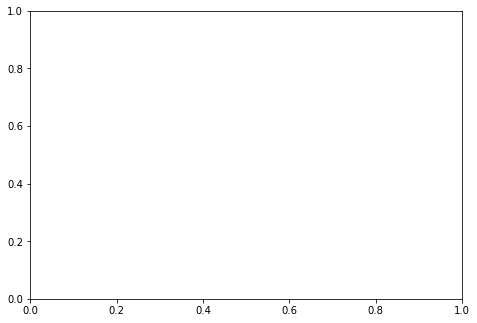

In [287]:
node_sizes = [D.in_degree(n, weight='weight') * 50 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)